In [18]:
!pip install seaborn
!pip install openpyxl
# Import necessary packages
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df=pd.read_excel("survey.xlsx")

In [20]:
df.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Approval,Chatbot,rating,userfriendlyrating,relevancerating,responsetime,effectiveness,Comments
0,1,2023-08-12 10:28:28,2023-08-12 10:30:03,anonymous,NaN,NaN,I agree,GPT 3.5 with LangChain,4,5,5,4,Yes,NaN
1,2,2023-08-12 11:17:43,2023-08-12 11:20:57,anonymous,NaN,NaN,I agree,GPT 3.5 with LangChain,4,5,4,3,Partially,NaN
2,3,2023-08-12 11:30:29,2023-08-12 11:33:50,anonymous,NaN,NaN,I agree,GPT 3.5 with LangChain,4,5,4,3,Yes,Sometimes the chatbot takes time to generate t...
3,6,2023-08-12 12:17:04,2023-08-12 12:22:06,anonymous,NaN,NaN,I agree,GPT 3.5 with LangChain,5,5,5,5,Yes,"Be more interactive in human conversations, i...."
4,7,2023-08-12 12:28:16,2023-08-12 12:40:14,anonymous,NaN,NaN,I agree,GPT 3.5 with LangChain,4,5,4,4,Yes,I tried the chatbot in Vietnamese. The answers...


In [21]:
df.describe()

,ID,Start time,Completion time,Name,Last modified time,rating,userfriendlyrating,relevancerating,responsetime
count,35.000000,35,35,0.0,0.0,35.000000,35.000000,35.000000,35.000000
mean,24.028571,2023-08-17 03:03:17.142856960,2023-08-17 03:13:32.514285824,NaN,NaN,3.942857,4.428571,4.028571,3.800000
min,1.000000,2023-08-12 10:28:28,2023-08-12 10:30:03,NaN,NaN,2.000000,2.000000,2.000000,1.000000
25%,13.500000,2023-08-13 19:37:25.500000,2023-08-13 19:57:59,NaN,NaN,4.000000,4.000000,4.000000,3.000000
50%,24.000000,2023-08-14 19:05:20,2023-08-14 19:07:45,NaN,NaN,4.000000,5.000000,4.000000,4.000000
75%,35.500000,2023-08-19 13:03:14,2023-08-19 13:52:42,NaN,NaN,4.000000,5.000000,4.500000,5.000000
max,44.000000,2023-08-24 17:25:49,2023-08-24 17:26:42,NaN,NaN,5.000000,5.000000,5.000000,5.000000
std,13.276440,NaN,NaN,NaN,NaN,0.725293,0.884032,0.746983,1.106133


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  35 non-null     int64         
 1   Start time          35 non-null     datetime64[ns]
 2   Completion time     35 non-null     datetime64[ns]
 3   Email               35 non-null     object        
 4   Name                0 non-null      float64       
 5   Last modified time  0 non-null      float64       
 6   Approval            35 non-null     object        
 7   Chatbot             35 non-null     object        
 8   rating              35 non-null     int64         
 9   userfriendlyrating  35 non-null     int64         
 10  relevancerating     35 non-null     int64         
 11  responsetime        35 non-null     int64         
 12  effectiveness       35 non-null     object        
 13  Comments            28 non-null     object        
d

In [45]:
# # rename columns for easier access
# df.rename(columns={'Which chatbot have you interacted with?':'Chatbot',
#                 #    'Please rate your overall satisfaction with the chatbot\'s performance.':'Rating',
#                 #    'How would you rate the ease of use and user-friendliness of the chatbot?': 'userfriendly', 
#                    'Did the chatbot provide accurate and relevant answers to your inquiries?': 'Relevance',
#                      'How satisfied were you with the chatbot\'s response time?':'Resposnetimesatisfaction',
#                        'Did the chatbot effectively address and resolve your issues or concerns?': 'effectivenessofresolvingissues'},
#                        inplace=True)

In [23]:
# Descriptive statistics of the dataset

# Group by the chatbot
df.groupby('Chatbot').describe()


ID                                             \
                       count       mean   min    25%   50%    75%   max   
Chatbot                                                                   
Alpaca                   6.0  15.500000  13.0  14.25  15.5  16.75  18.0   
BARD                     4.0  23.000000  20.0  20.75  21.5  23.75  29.0   
GPT 3.5 with LangChain  14.0  17.857143   1.0   6.25  10.5  33.25  39.0   
GPT3.5                   7.0  33.714286  30.0  31.50  33.0  35.00  40.0   
HuggingChat              4.0  42.500000  41.0  41.75  42.5  43.25  44.0   

                                  Start time                                 \
                              std      count                           mean   
Chatbot                                                                       
Alpaca                   1.870829          6  2023-08-13 21:17:01.666666496   
BARD                     4.082483          4  2023-08-15 10:50:25.249999872   
GPT 3.5 with LangChain  14.821280         14  2023-08-15 14:41:54.999999744   
GPT3.5                   3.401680          7  2023-08-19 13:13:06.000000256   
HuggingChat              1.290994          4  2023-08-24 17:23:09.249999872   

                        ... relevancerating           responsetime            \
                        ...             max       std        count      mean   
Chatbot                 ...                                                    
Alpaca                  ...             4.0  0.836660          6.0  2.166667   
BARD                    ...             5.0  0.816497          4.0  4.000000   
GPT 3.5 with LangChain  ...             5.0  0.611250         14.0  4.142857   
GPT3.5                  ...             5.0  0.899735          7.0  4.285714   
HuggingChat             ...             5.0  0.500000          4.0  4.000000   

                                                             
                        min   25%  50%   75%  max       std  
Chatbot                                                      
Alpaca                  1.0  1.25  2.5  3.00  3.0  0.983192  
BARD                    3.0  3.75  4.0  4.25  5.0  0.816497  
GPT 3.5 with LangChain  3.0  3.25  4.0  5.00  5.0  0.864438  
GPT3.5                  3.0  3.50  5.0  5.00  5.0  0.951190  
HuggingChat             4.0  4.00  4.0  4.00  4.0  0.000000  

[5 rows x 72 columns]

['GPT 3.5 with LangChain' 'Alpaca' 'BARD' 'GPT3.5' 'HuggingChat']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


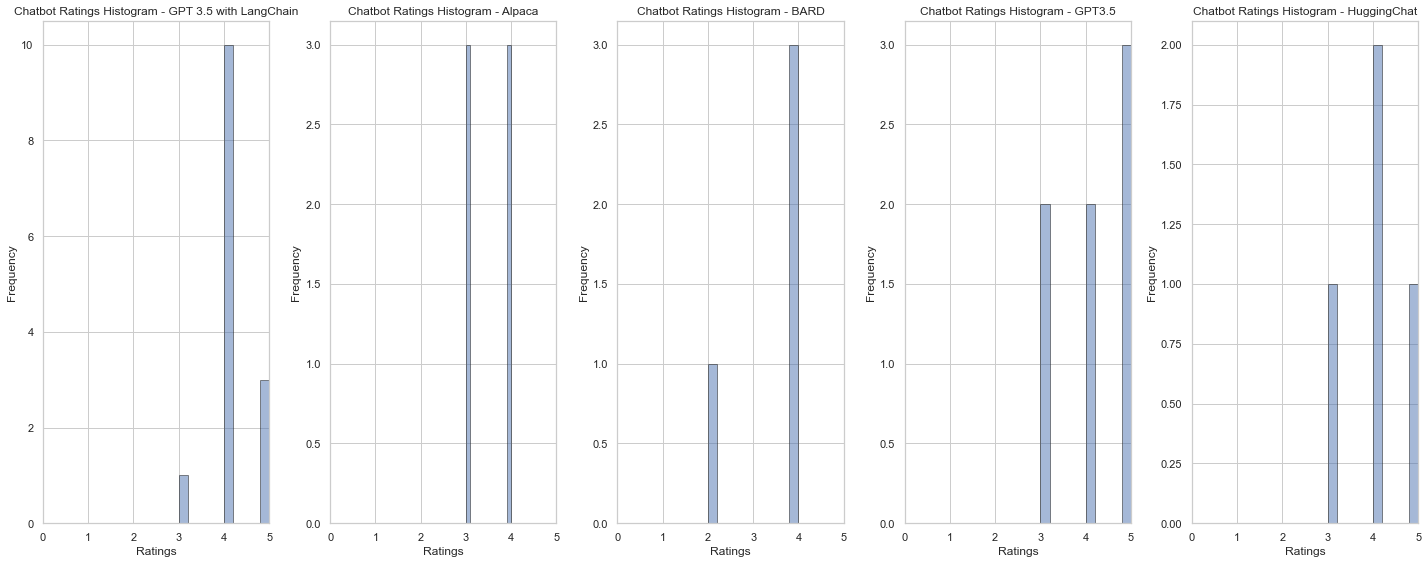

In [45]:
# Check the distribution of overall ratings for each bot
# Get unique bot names
unique_bots = df["Chatbot"].unique()
print(unique_bots)

# Set the number of bins (histogram bars)
num_bins = 10

# Create subplots for each bot
num_plots = len(unique_bots)
fig, axes = plt.subplots(1, num_plots, figsize=(4*num_plots, 8 ))

# Loop through each bot and plot its histogram in a separate subplot
for i, bot_name in enumerate(unique_bots):
    bot_ratings = df[df["Chatbot"] == bot_name]["rating"]
    
    axes[i].hist(bot_ratings, bins=num_bins, edgecolor="k", alpha=0.5)
    axes[i].set_xlabel("Ratings")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Chatbot Ratings Histogram - {bot_name}")
    axes[i].set_xlim([0, 5])

# Adjust layout
plt.tight_layout()



# Save in eps format
plt.savefig('q1.eps', format='eps')

# Show the plot
plt.show()


In [46]:
df.groupby('Chatbot')['rating'].describe()
# get only chatbot and mean rating
df.groupby('Chatbot')['rating'].mean()  




Chatbot
Alpaca                    3.500000
BARD                      3.500000
GPT 3.5 with LangChain    4.142857
GPT3.5                    4.142857
HuggingChat               4.000000
Name: rating, dtype: float64

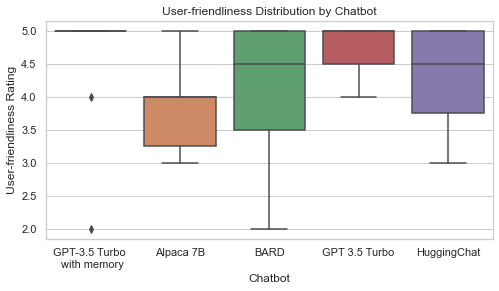

In [47]:
# Check the distribution of userfriendly ratings for each bot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x="Chatbot", y="userfriendlyrating", data=df)

# Add labels and title
plt.xlabel("Chatbot")
plt.ylabel("User-friendliness Rating")
plt.title("User-friendliness Distribution by Chatbot")

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# explicitly specify the x-axis labels
plt.xticks([0, 1, 2, 3, 4], ["GPT-3.5 Turbo \n with memory", "Alpaca 7B", "BARD", "GPT 3.5 Turbo", "HuggingChat"], ha="center")

# Save in eps format
plt.savefig('q2.eps', format='eps')

# Show the plot
plt.show()



In [48]:
df.groupby('Chatbot')['userfriendlyrating'].describe()

,count,mean,std,min,25%,50%,75%,max
Chatbot,,,,,,,,
Alpaca,6.0,3.833333,0.752773,3.0,3.25,4.0,4.0,5.0
BARD,4.0,4.000000,1.414214,2.0,3.50,4.5,5.0,5.0
GPT 3.5 with LangChain,14.0,4.714286,0.825420,2.0,5.00,5.0,5.0,5.0
GPT3.5,7.0,4.714286,0.487950,4.0,4.50,5.0,5.0,5.0
HuggingChat,4.0,4.250000,0.957427,3.0,3.75,4.5,5.0,5.0


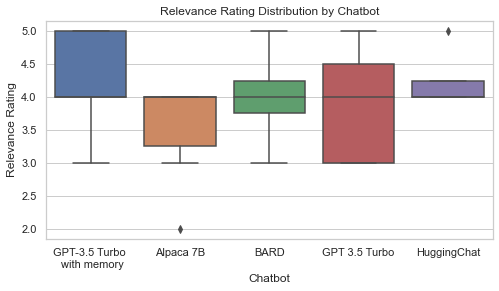

In [50]:
# Check the distribution of relevance ratings for each bot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(8,4))
sns.boxplot(x="Chatbot", y="relevancerating", data=df)

# Add labels and title
plt.xlabel("Chatbot")
plt.ylabel("Relevance Rating")
plt.title("Relevance Rating Distribution by Chatbot")

plt.xticks([0, 1, 2, 3, 4], ["GPT-3.5 Turbo \n with memory", "Alpaca 7B", "BARD", "GPT 3.5 Turbo", "HuggingChat"], ha="center")

# Save in eps format
plt.savefig('q3.eps', format='eps')

# Show the plot
plt.show()

In [42]:
df.groupby('Chatbot')['relevancerating'].describe()

,count,mean,std,min,25%,50%,75%,max
Chatbot,,,,,,,,
Alpaca,6.0,3.500000,0.836660,2.0,3.25,4.0,4.00,4.0
BARD,4.0,4.000000,0.816497,3.0,3.75,4.0,4.25,5.0
GPT 3.5 with LangChain,14.0,4.285714,0.611250,3.0,4.00,4.0,5.00,5.0
GPT3.5,7.0,3.857143,0.899735,3.0,3.00,4.0,4.50,5.0
HuggingChat,4.0,4.250000,0.500000,4.0,4.00,4.0,4.25,5.0


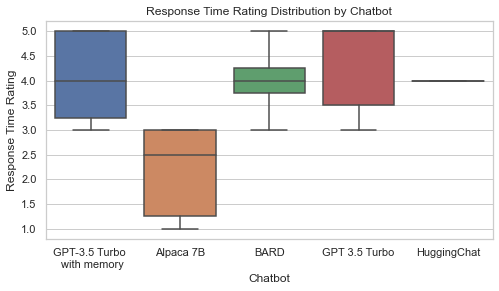

In [52]:
# Responsetime rating by chatbot
# Check the distribution of response time rating for each bot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(8,4))
sns.boxplot(x="Chatbot", y="responsetime", data=df)

# Add labels and title
plt.xlabel("Chatbot")
plt.ylabel("Response Time Rating")
plt.title("Response Time Rating Distribution by Chatbot")

plt.xticks([0, 1, 2, 3, 4], ["GPT-3.5 Turbo \n with memory", "Alpaca 7B", "BARD", "GPT 3.5 Turbo", "HuggingChat"], ha="center")

# Save in eps format
plt.savefig('q4.eps', format='eps')

# Show the plot
plt.show()

In [31]:
df.groupby('Chatbot')['responsetime'].describe()

,count,mean,std,min,25%,50%,75%,max
Chatbot,,,,,,,,
Alpaca,6.0,2.166667,0.983192,1.0,1.25,2.5,3.00,3.0
BARD,4.0,4.000000,0.816497,3.0,3.75,4.0,4.25,5.0
GPT 3.5 with LangChain,14.0,4.142857,0.864438,3.0,3.25,4.0,5.00,5.0
GPT3.5,7.0,4.285714,0.951190,3.0,3.50,5.0,5.00,5.0
HuggingChat,4.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


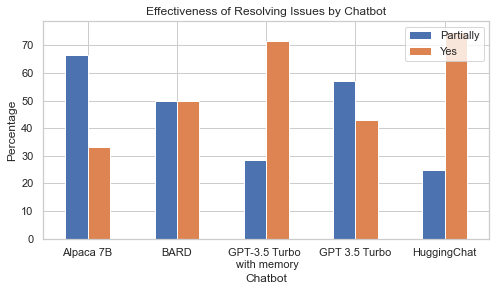

In [54]:
# Effectiveness Rating by chatbot
df.groupby('Chatbot')['effectiveness'].describe()
# check the percentage of each rating for each chatbot
effectiveness =df.groupby('Chatbot')['effectiveness'].value_counts(normalize=True) * 100
effectiveness

# plot effectiveness as bar chart for each chatbot
effectiveness.unstack().plot(kind='bar', figsize=(8, 4), rot=0)
plt.xlabel("Chatbot")
plt.ylabel("Percentage")
plt.title("Effectiveness of Resolving Issues by Chatbot")
plt.legend(loc='upper right')
plt.xticks([0, 1, 2, 3, 4], [ "Alpaca 7B", "BARD","GPT-3.5 Turbo \n with memory", "GPT 3.5 Turbo", "HuggingChat"], ha="center")

# Save in eps format
plt.savefig('q5.eps', format='eps')
plt.show()



In [55]:
# # Effectiveness Rating by chatbot in percentage
df.groupby('Chatbot')['effectiveness'].describe()
# check the percentage of each rating for each chatbot
effectiveness =df.groupby('Chatbot')['effectiveness'].value_counts(normalize=True) * 100
effectiveness




Chatbot                 effectiveness
Alpaca                  Partially        66.666667
                        Yes              33.333333
BARD                    Partially        50.000000
                        Yes              50.000000
GPT 3.5 with LangChain  Yes              71.428571
                        Partially        28.571429
GPT3.5                  Partially        57.142857
                        Yes              42.857143
HuggingChat             Yes              75.000000
                        Partially        25.000000
Name: proportion, dtype: float64